<a href="https://colab.research.google.com/github/palberth/CienciaDatos-MASDI/blob/main/Activida_3_5_Ciencia_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/ynykrk7j)

## Introducción

Este informe detalla el análisis exploratorio, preprocesamiento, y modelado de un conjunto de datos sobre indicadores de salud global y esperanza de vida.

Para ilustrar este proceso, utilizaremos un dataset que fue seleccionado para abordar un problema de regresión, cuyo objetivo es predecir la esperanza de vida en función de diversas variables predictoras relacionadas con salud, economía y demografía.

A continuación, se muestra cómo cargar este dataset en un DataFrame de Pandas.

In [49]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [50]:
IN_COLAB

True

In [51]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())
dir_root

'/'

In [53]:
# Importamos la biblioteca pandas
import pandas as pd

# Cargar el dataset
data = pd.read_csv("/content/Life Expectancy Data.csv", on_bad_lines='skip', encoding='latin-1')

# Mostramos las primeras 15 filas del dataset con sus encabezados
data.head(15)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


## Importación de Librerias
Realizamos la importación de las librerias necesarias

In [86]:
# Importar Otras librerías necesarias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

## Transformación de Encabezados
Realizamos la traducción de los encabezados


In [55]:
# Traducción de encabezados
translated_columns = {
    "Country": "País",
    "Year": "Año",
    "Status": "Estado",
    "Life expectancy ": "Esperanza de vida",
    "Adult Mortality": "Mortalidad adulta",
    "infant deaths": "Muertes infantiles",
    "Alcohol": "Consumo de alcohol",
    "percentage expenditure": "Porcentaje de gasto",
    "Hepatitis B": "Vacunación Hepatitis B",
    "Measles ": "Casos de sarampión",
    " BMI ": "Índice de masa corporal (IMC)",
    "under-five deaths ": "Muertes menores de cinco años",
    "Polio": "Vacunación contra la poliomielitis",
    "Total expenditure": "Gasto total",
    "Diphtheria ": "Vacunación contra la difteria",
    " HIV/AIDS": "VIH/SIDA",
    "GDP": "PIB",
    "Population": "Población",
    " thinness  1-19 years": "Delgadez 1-19 años",
    " thinness 5-9 years": "Delgadez 5-9 años",
    "Income composition of resources": "Composición de ingresos de los recursos",
    "Schooling": "Escolaridad",
}
data.rename(columns=translated_columns, inplace=True)
data.head()

,País,Año,Estado,Esperanza de vida,Mortalidad adulta,Muertes infantiles,Consumo de alcohol,Porcentaje de gasto,Vacunación Hepatitis B,Casos de sarampión,...,Vacunación contra la poliomielitis,Gasto total,Vacunación contra la difteria,VIH/SIDA,PIB,Población,Delgadez 1-19 años,Delgadez 5-9 años,Composición de ingresos de los recursos,Escolaridad
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Exploranción del DataFrame

Una vez que el dataset se ha cargado en un DataFrame de Pandas, podemos explorar el dataset utilizando varias funciones de Pandas.


### 1. Obtener información sobre el DataFrame

De esta manera, podemos ver el número de filas y columnas que contiene el DataFrame, junto con el tipo de datos que contiene cada columna.

Lo cual nos permite responder preguntas como:

* ¿Cuántas filas y columnas hay en el DataFrame?
* ¿Qué tipo de datos contiene cada columna?
* ¿Hay valores faltantes en el DataFrame?
* ¿Qué columnas o filas contienen valores faltantes?
* ¿Qué columnas contienen valores numéricos?
* ¿Qué columnas contienen valores no numéricos?
* ¿Qué columnas pueden ser características?
* ¿Qué columna contiene la variable objetivo?


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   País                                     2938 non-null   object 
 1   Año                                      2938 non-null   int64  
 2   Estado                                   2938 non-null   object 
 3   Esperanza de vida                        2928 non-null   float64
 4   Mortalidad adulta                        2928 non-null   float64
 5   Muertes infantiles                       2938 non-null   int64  
 6   Consumo de alcohol                       2744 non-null   float64
 7   Porcentaje de gasto                      2938 non-null   float64
 8   Vacunación Hepatitis B                   2385 non-null   float64
 9   Casos de sarampión                       2938 non-null   int64  
 10  Índice de masa corporal (IMC)            2904 no

### 2. Obtener estadísticas descriptivas del DataFrame

Es posible utilizar la función `describe()` para obtener estadísticas descriptivas del DataFrame.

Esto nos permite responder preguntas como:

* ¿Cuál es el valor mínimo en una columna?
* ¿Cuál es el valor máximo en una columna?
* ¿Cuál es el valor medio en una columna?
* ¿Cuál es la desviación estándar en una columna?
* ¿Cuál es el valor mínimo en una fila?
* ¿Cuál es el valor máximo en una fila?
  

In [57]:
data.describe()

,Año,Esperanza de vida,Mortalidad adulta,Muertes infantiles,Consumo de alcohol,Porcentaje de gasto,Vacunación Hepatitis B,Casos de sarampión,Índice de masa corporal (IMC),Muertes menores de cinco años,Vacunación contra la poliomielitis,Gasto total,Vacunación contra la difteria,VIH/SIDA,PIB,Población,Delgadez 1-19 años,Delgadez 5-9 años,Composición de ingresos de los recursos,Escolaridad
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### 3. Verificar si hay valores faltantes

Es posible utilizar la función `isnull()` para verificar si hay valores faltantes en el DataFrame.

In [58]:
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 País                                         0
Año                                          0
Estado                                       0
Esperanza de vida                           10
Mortalidad adulta                           10
Muertes infantiles                           0
Consumo de alcohol                         194
Porcentaje de gasto                          0
Vacunación Hepatitis B                     553
Casos de sarampión                           0
Índice de masa corporal (IMC)               34
Muertes menores de cinco años                0
Vacunación contra la poliomielitis          19
Gasto total                                226
Vacunación contra la difteria               19
VIH/SIDA                                     0
PIB                                        448
Población                                  652
Delgadez 1-19 años                          34
Delgadez 5-9 años                           34
Composición de ingresos de l

### 4. Explorar la correlación entre las columnas

En un problema de clustering, es importante explorar la correlación entre las columnas. Esto nos permite responder preguntas como:

* ¿Qué columnas están altamente correlacionadas?
* ¿Qué columnas están débilmente correlacionadas?
* ¿Qué columnas no están correlacionadas?
* ¿Qué columnas son las más importantes para el problema de clustering?
* ¿Qué columnas son las menos importantes para el problema de clustering?
* ¿Qué columnas pueden ser eliminadas del DataFrame?
* ¿Qué columnas pueden ser características?
  

In [59]:
# Correlaciones
correlation_matrix = data.corr(numeric_only=True) #Incluye solo características numéricas para el cálculo de correlación.
correlation_matrix["Esperanza de vida"].sort_values(ascending=False)


,Esperanza de vida
Esperanza de vida,1.000000
Escolaridad,0.751975
Composición de ingresos de los recursos,0.724776
Índice de masa corporal (IMC),0.567694
Vacunación contra la difteria,0.479495
Vacunación contra la poliomielitis,0.465556
PIB,0.461455
Consumo de alcohol,0.404877
Porcentaje de gasto,0.381864
Vacunación Hepatitis B,0.256762


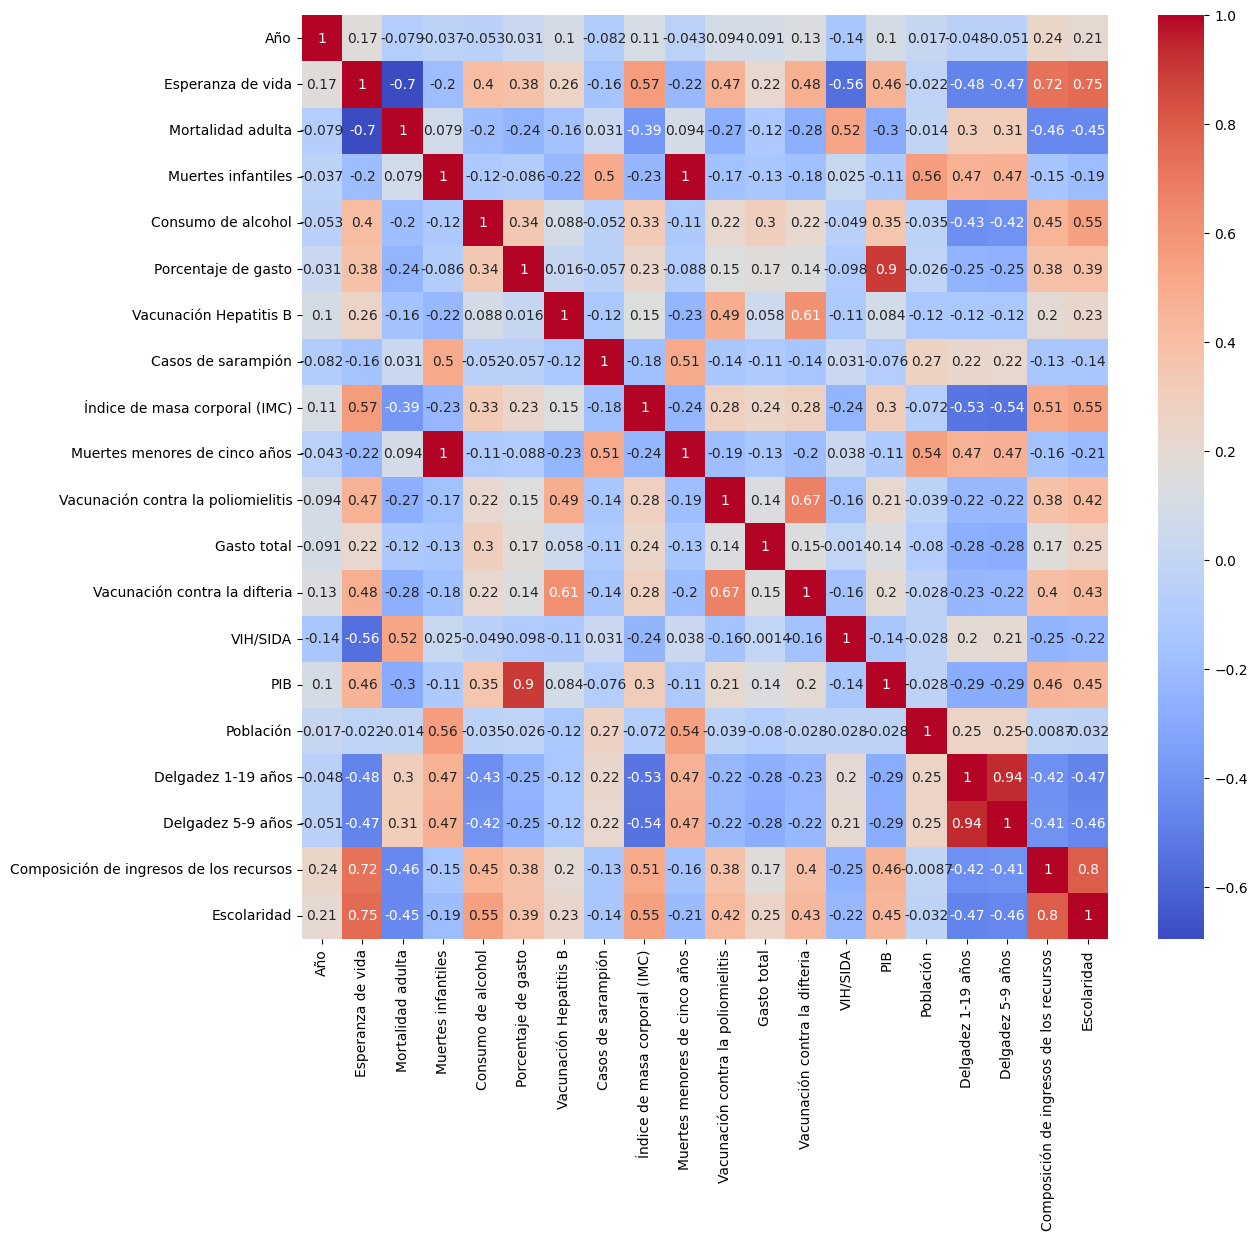

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlaciones
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(13,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

De la trama anterior obtuvimos mucha información.
* La esperanza de vida y la población aumentaron con los años.
* Cuanto mayor sea el PIB y el gasto total, mayor será la tasa de esperanza de vida
* Los Delgadez 1-19 y Delgadez 5-9 tienen la misma distribución por lo que probablemente elegiremos uno de ellos para nuestro modelo.
* Cuanto más se vacuna el país, mayor es la esperanza de vida
* La columna de IMC no tiene sentido: nuestro IMC medio es de aproximadamente 50, lo que significa que más de la mitad de la población de nuestros datos tiene obesidad grave y necesita atención médica.
* La muerte de menores de 5 años y la muerte infantil son prácticamente la misma columna, por lo que elegimos la columna más generalizada, la columna de menores de 5 años.

### 5. Explorar la distribución de las columnas

Es posible utilizar la función `hist()` para explorar la distribución de las columnas numéricas.

Esto nos permite responder preguntas como:

* ¿Qué columnas tienen una distribución normal?

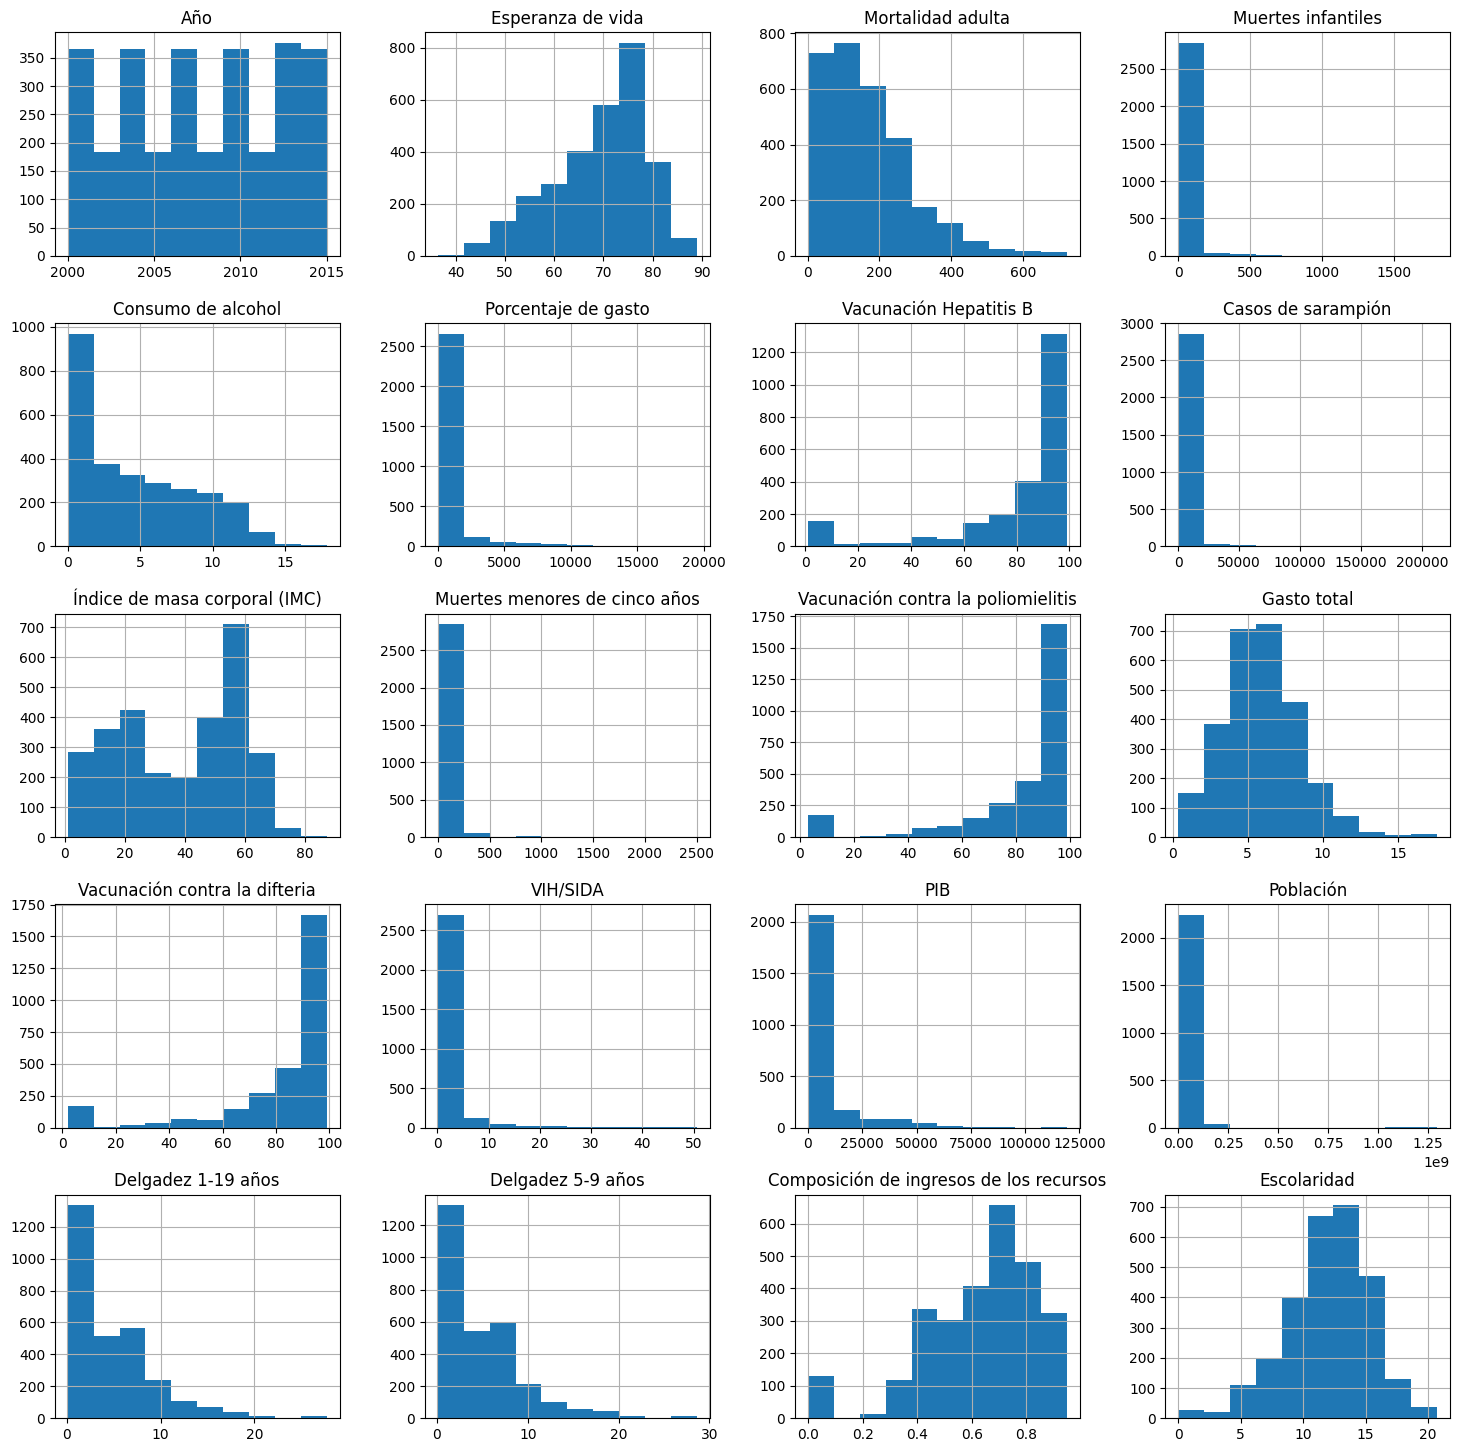

In [88]:
data.hist(figsize=(18, 18))
plt.show()

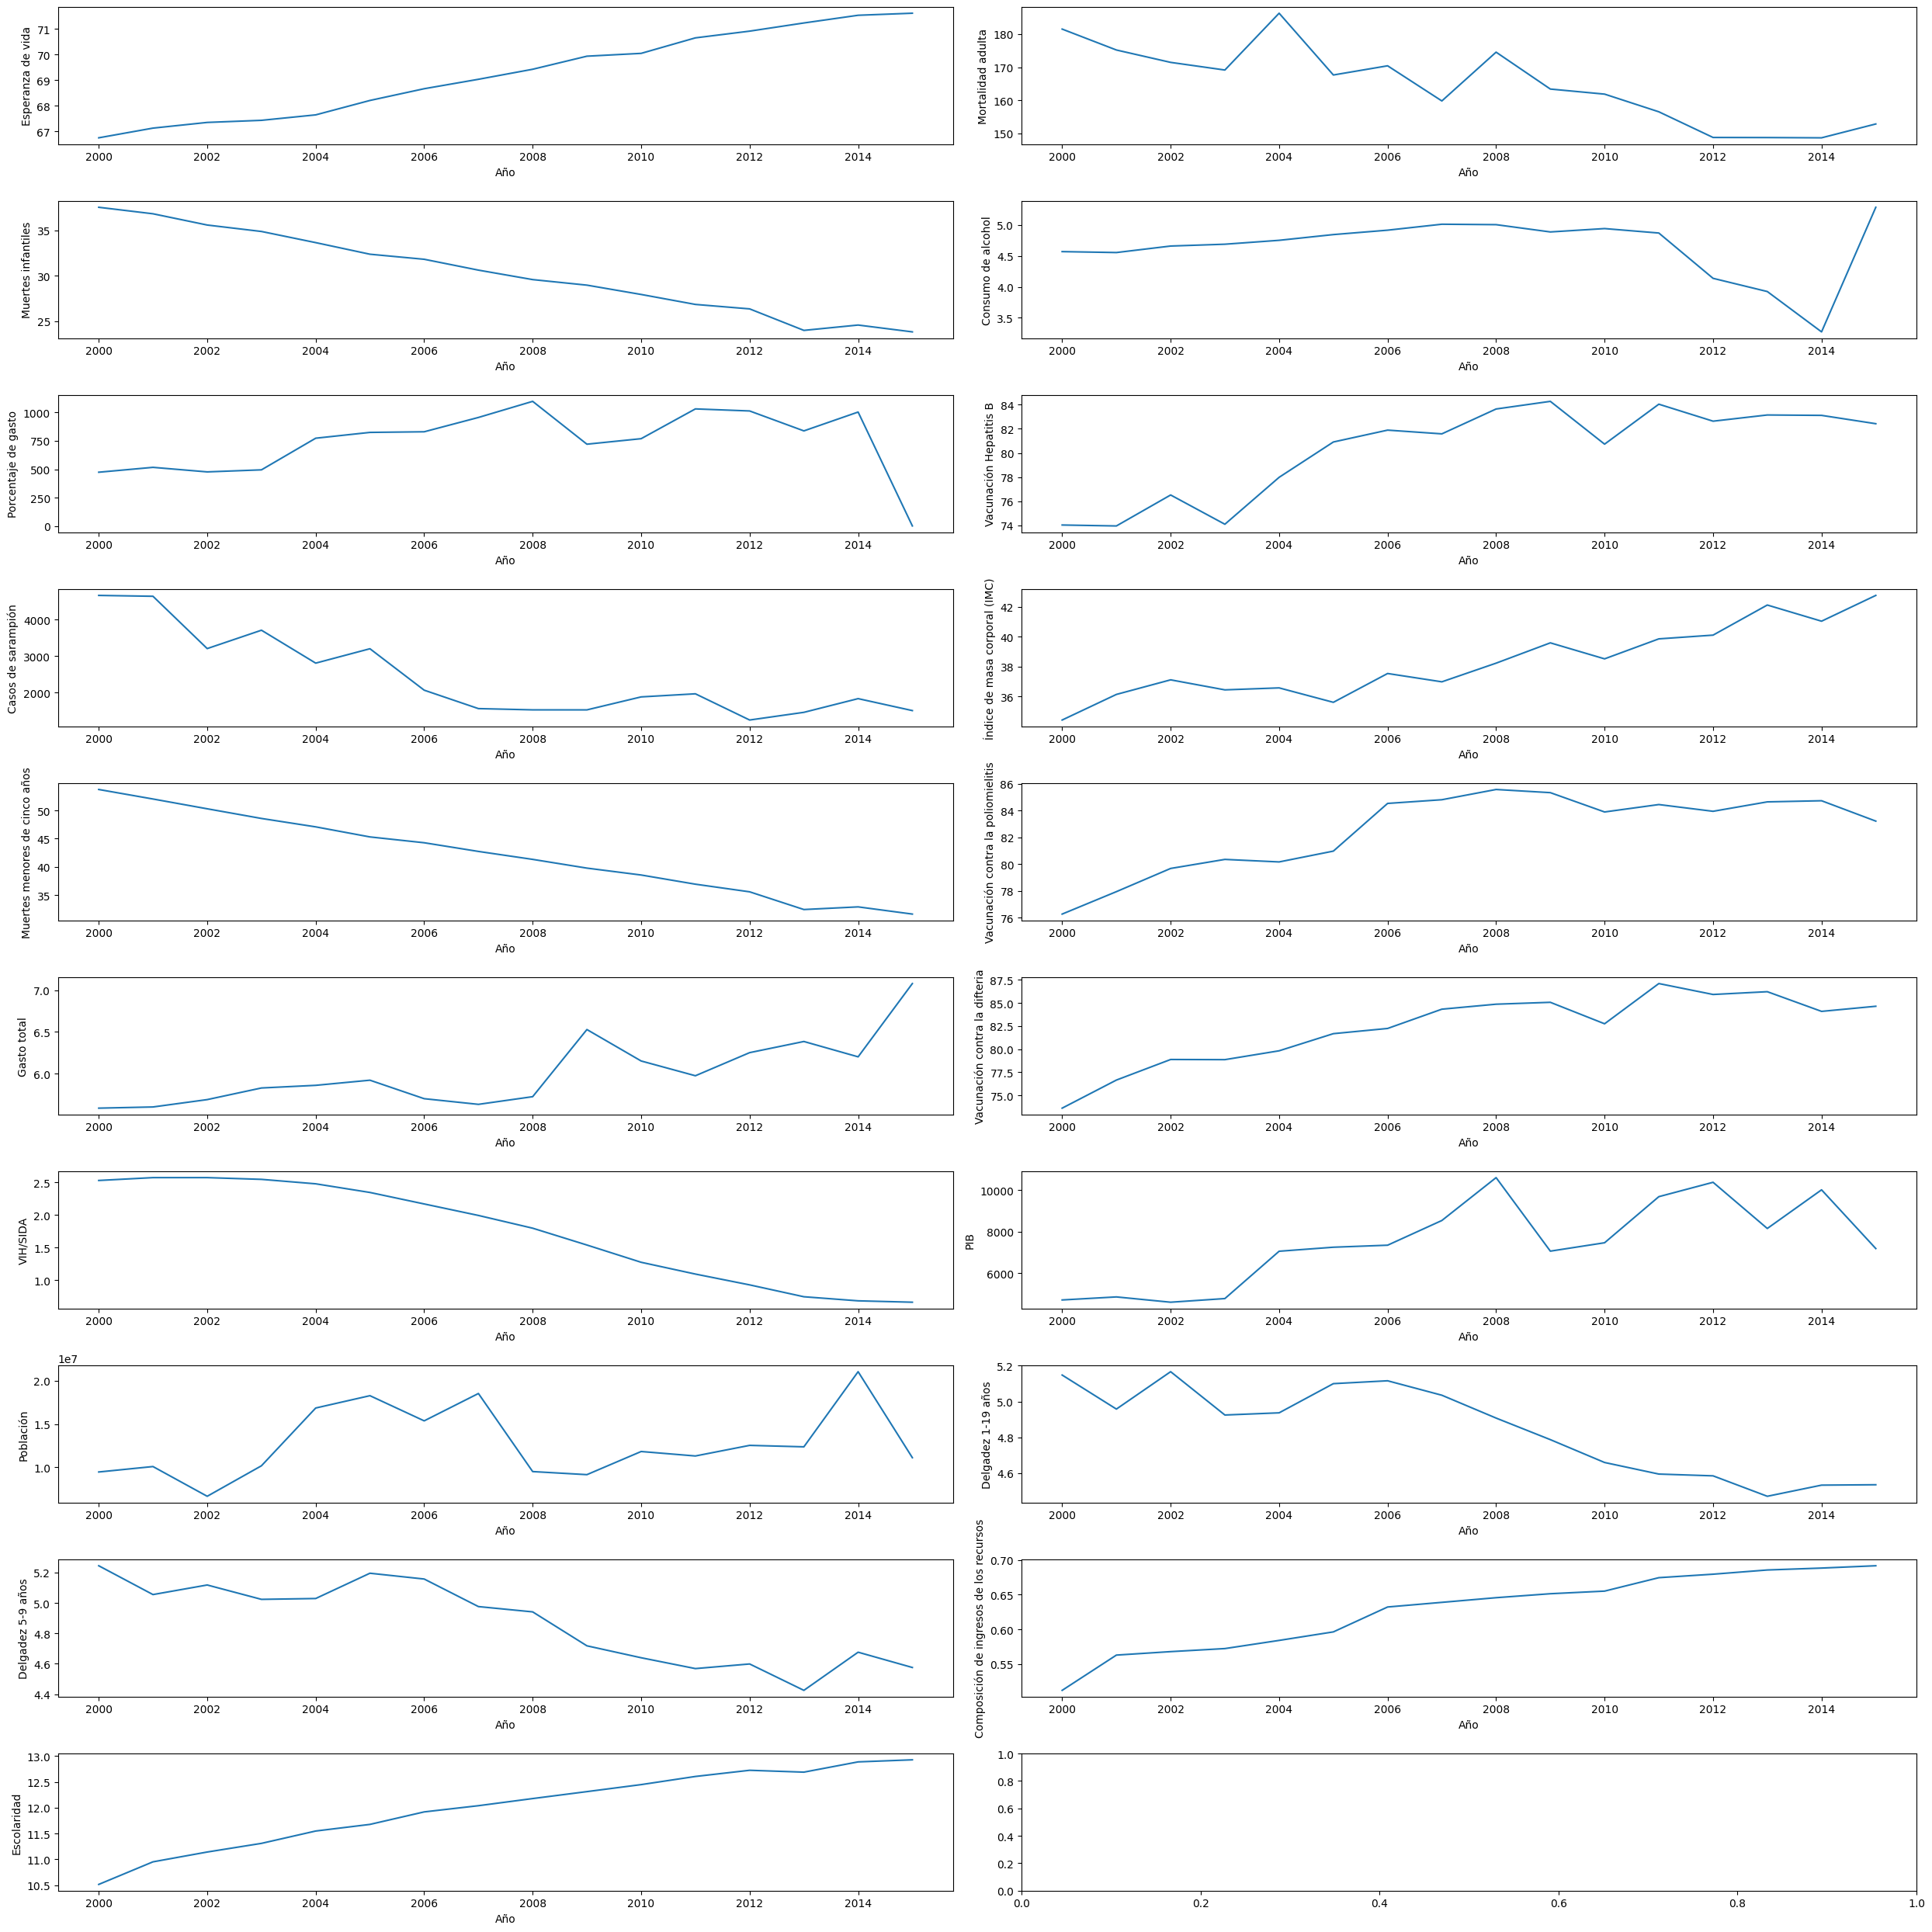

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

df = data

# Se define num_col como una lista de columnas numéricas
num_col = df.select_dtypes(include=['number']).columns.tolist()

fig, axes = plt.subplots(nrows=len(df[num_col].columns) // 2, ncols=2, figsize=(25, 25))

# Se Itera a través de columnas numéricas, excluyendo 'Año' si está en num_col
for idx, col in enumerate([c for c in df[num_col].columns if c != 'Año']):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.lineplot(x='Año', y=df[col], data=df, ax=axes[row_idx, col_idx], markers=True, errorbar=None)

# Si tiene un número impar de tramas, es posible que deba eliminar la última subtrama vacía
# Ajuste el índice en consecuencia si es necesario
if len(df[num_col].columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

* Con los años, la esperanza de vida, la escolaridad y la composición de los ingresos de los recursos aumentan
mientras que el VIH/SIDA, las muertes de menores de 5 años, el sarampión y la mortalidad en adultos están disminuyendo

### 6. Preprocesamiento de datos
Incluye imputación de valores faltantes, normalización y codificación de variables categóricas.


In [78]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Select only numerical features for imputation
numerical_features = data.select_dtypes(include=['number']).columns

# Imputación de valores faltantes solo en columnas numéricas
imputer = SimpleImputer(strategy="mean")
data_imputed = data.copy()
data_imputed[numerical_features] = imputer.fit_transform(data_imputed[numerical_features])

# Normalización
scaler = MinMaxScaler()
data_scaled = data_imputed.copy()
data_scaled[numerical_features.drop(['Esperanza de vida'])] = scaler.fit_transform(data_scaled[numerical_features.drop(['Esperanza de vida'])]) #Deberíamos eliminar la variable objetivo en este caso es Esperanza de vida.

# Codificación One-Hot Encoding
# Include 'País' in the columns to be encoded
data_encoded = pd.get_dummies(data_scaled, columns=["Estado", "País"], drop_first=True)

# División de los datos
X = data_encoded.drop(columns=["Esperanza de vida"])
y = data_encoded["Esperanza de vida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7.Modelado y evaluación
Implementamos modelos y generamos las métricas.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelos
models = {
    "Regresión Lineal": LinearRegression(),
    "Bosque Aleatorio": RandomForestRegressor(random_state=42),
    "Soporte Vectorial": SVR()
}


In [65]:
# Entrenamiento y evaluación
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }


In [67]:
# Resultados
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE      RMSE        R2
Regresión Lineal   1.185378  1.853586  0.960342
Bosque Aleatorio   1.027758  1.618082  0.969779
Soporte Vectorial  1.996018  3.164108  0.884440


### 8. Visualización de resultados
Graficamos las métricas de evaluación.


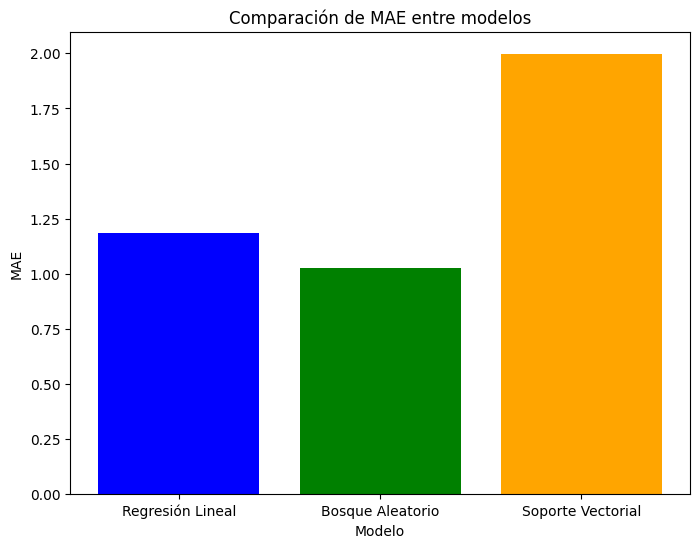

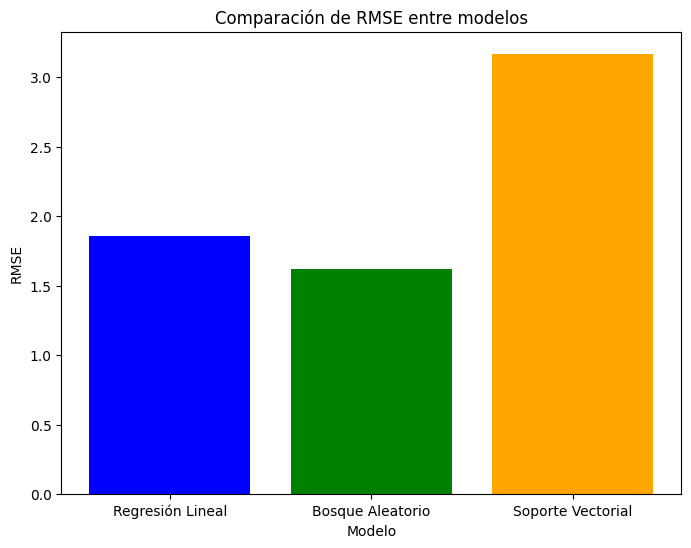

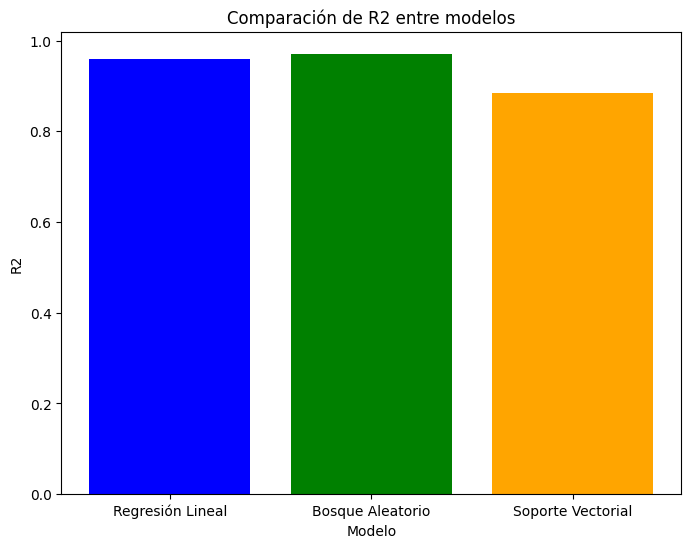

In [94]:
import matplotlib.pyplot as plt

# Comparación de métricas
metrics = ["MAE", "RMSE", "R2"]
for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar(results_df.index, results_df[metric], color=["blue", "green", "orange"])
    plt.title(f"Comparación de {metric} entre modelos")
    plt.ylabel(metric)
    plt.xlabel("Modelo")
    plt.show()
